# Project 1: Predicting the Sale Price of Bulldozers

# Get workspace ready

In [ ]:
!nvidia-smi

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

# 1.Data pre-processing

In [2]:
df = pd.read_csv("/content/TrainAndValid.csv", low_memory=False)

In [3]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.tail()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
412693,6333344,10000.0,1919201,21435,149,2.0,2005,NaN,NaN,3/7/2012 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412694,6333345,10500.0,1882122,21436,149,2.0,2005,NaN,NaN,1/28/2012 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412695,6333347,12500.0,1944213,21435,149,2.0,2005,NaN,NaN,1/28/2012 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412696,6333348,10000.0,1794518,21435,149,2.0,2006,NaN,NaN,3/7/2012 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412697,6333349,13000.0,1944743,21436,149,2.0,2006,NaN,NaN,1/28/2012 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [7]:
df.isna().sum()

,0
SalesID,0
SalePrice,0
MachineID,0
ModelID,0
datasource,0
auctioneerID,20136
YearMade,0
MachineHoursCurrentMeter,265194
UsageBand,339028
saledate,0


In [8]:
df.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

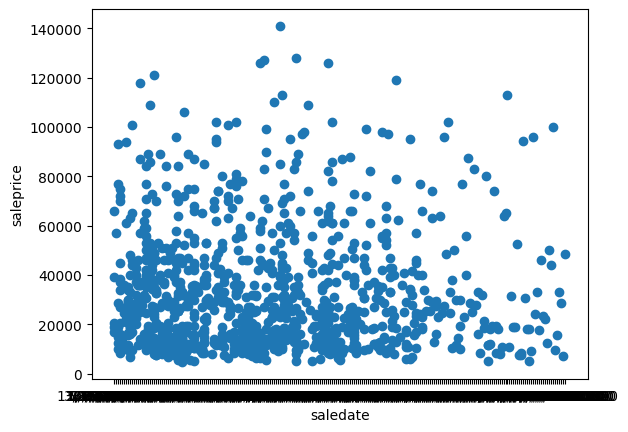

In [9]:
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000])
ax.set_xlabel("saledate")
ax.set_ylabel("saleprice")
plt.show()

In [10]:
df.saledate[:1000]

,saledate
0,11/16/2006 0:00
1,3/26/2004 0:00
2,2/26/2004 0:00
3,5/19/2011 0:00
4,7/23/2009 0:00
...,...
995,7/16/2009 0:00
996,6/14/2007 0:00
997,9/22/2005 0:00
998,7/28/2005 0:00


<Axes: ylabel='Frequency'>

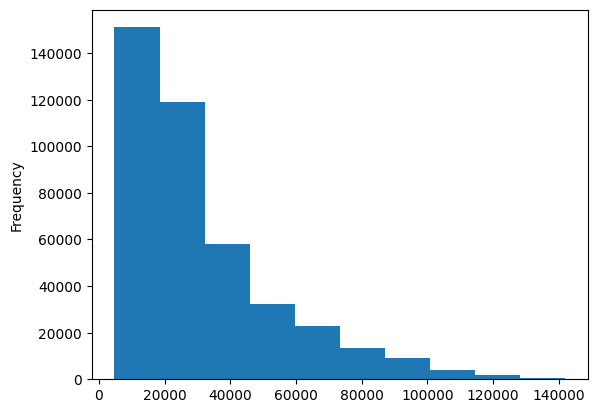

In [11]:
df.SalePrice.plot.hist()

## Parsing dates

In [12]:
df = pd.read_csv("TrainAndValid.csv", low_memory=False, parse_dates=["saledate"])

In [15]:
df["saledate"]

,saledate
0,2006-11-16
1,2004-03-26
2,2004-02-26
3,2011-05-19
4,2009-07-23
...,...
412693,2012-03-07
412694,2012-01-28
412695,2012-01-28
412696,2012-03-07


In [16]:
df.saledate[:1000]

,saledate
0,2006-11-16
1,2004-03-26
2,2004-02-26
3,2011-05-19
4,2009-07-23
...,...
995,2009-07-16
996,2007-06-14
997,2005-09-22
998,2005-07-28


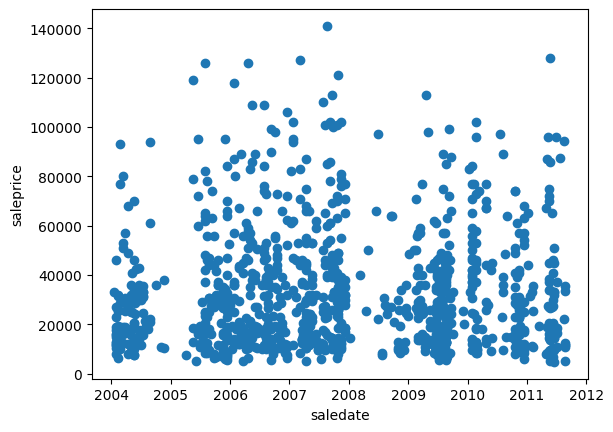

In [17]:
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000])
ax.set_xlabel("saledate")
ax.set_ylabel("saleprice")
plt.show()

In [18]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [20]:
df.saledate.head(10)

,saledate
0,2006-11-16
1,2004-03-26
2,2004-02-26
3,2011-05-19
4,2009-07-23
5,2008-12-18
6,2004-08-26
7,2005-11-17
8,2009-08-27
9,2007-08-09


## Sort DataFrame by saledate

In [21]:
df.sort_values(by=["saledate"], inplace=True, ascending=True)
df.saledate.head(20)

,saledate
205615,1989-01-17
274835,1989-01-31
141296,1989-01-31
212552,1989-01-31
62755,1989-01-31
54653,1989-01-31
81383,1989-01-31
204924,1989-01-31
135376,1989-01-31
113390,1989-01-31


## Make a copy of the original DataFrame

In [22]:
df["saledate"]

,saledate
205615,1989-01-17
274835,1989-01-31
141296,1989-01-31
212552,1989-01-31
62755,1989-01-31
...,...
410879,2012-04-28
412476,2012-04-28
411927,2012-04-28
407124,2012-04-28


In [23]:
df_tmp = df.copy()

In [24]:
df_tmp.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

In [25]:
df_tmp["saledate"]

,saledate
205615,1989-01-17
274835,1989-01-31
141296,1989-01-31
212552,1989-01-31
62755,1989-01-31
...,...
410879,2012-04-28
412476,2012-04-28
411927,2012-04-28
407124,2012-04-28


## Add datetime parameters for saledate column

In [26]:
df_tmp["saleYear"] = df_tmp.saledate.dt.year
df_tmp["saleMonth"] = df_tmp.saledate.dt.month
df_tmp["saleDay"] = df_tmp.saledate.dt.day
df_tmp["saleDayOfWeek"] = df_tmp.saledate.dt.dayofweek
df_tmp["saleDayOfYear"] = df_tmp.saledate.dt.dayofyear

In [27]:
df_tmp["saleYear"]

,saleYear
205615,1989
274835,1989
141296,1989
212552,1989
62755,1989
...,...
410879,2012
412476,2012
411927,2012
407124,2012


In [28]:
df_tmp.drop("saledate", axis=1, inplace=True)

In [29]:
df_tmp.state.value_counts()

,count
state,
Florida,67320
Texas,53110
California,29761
Washington,16222
Georgia,14633
Maryland,13322
Mississippi,13240
Ohio,12369
Illinois,11540


In [30]:
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,TD20,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,A66,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,D7G,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,31,1,31
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,A62,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,D3B,...,None or Unspecified,PAT,Lever,NaN,NaN,1989,1,31,1,31


In [31]:
len(df_tmp)

412698

# 2.Building a model

In [32]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=-1, random_state=42)
model

RandomForestRegressor(n_jobs=-1, random_state=42)

In [33]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-null   o

In [34]:
df_tmp["UsageBand"].dtype

dtype('O')

In [35]:
df_tmp.isna().sum()

,0
SalesID,0
SalePrice,0
MachineID,0
ModelID,0
datasource,0
auctioneerID,20136
YearMade,0
MachineHoursCurrentMeter,265194
UsageBand,339028
fiModelDesc,0


## Convert string to categories

In [36]:
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


In [37]:
pd.api.types.is_string_dtype(df_tmp["UsageBand"])

False

In [38]:
pd.api.types.is_string_dtype(df_tmp["state"])

True

In [39]:
pd.api.types.is_object_dtype(df_tmp["Steering_Controls"])

True

In [40]:
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

fiModelDesc
fiBaseModel
fiProductClassDesc
state
ProductGroup
ProductGroupDesc


In [41]:
for label, content in df_tmp.items():
    if pd.api.types.is_object_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [42]:
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label] = content.astype("category").cat.as_ordered()

In [43]:
for label, content in df_tmp.items():
    if pd.api.types.is_object_dtype(content):
        df_tmp[label] = content.astype("category").cat.as_ordered()

In [44]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor         748

In [45]:
df_tmp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [46]:
df_tmp.state.value_counts()

,count
state,
Florida,67320
Texas,53110
California,29761
Washington,16222
Georgia,14633
Maryland,13322
Mississippi,13240
Ohio,12369
Illinois,11540


In [47]:
df_tmp.state.cat.codes

,0
205615,43
274835,8
141296,8
212552,8
62755,8
...,...
410879,4
412476,4
411927,4
407124,4


In [48]:
df_tmp.isnull().sum()/len(df_tmp)

,0
SalesID,0.000000
SalePrice,0.000000
MachineID,0.000000
ModelID,0.000000
datasource,0.000000
auctioneerID,0.048791
YearMade,0.000000
MachineHoursCurrentMeter,0.642586
UsageBand,0.821492
fiModelDesc,0.000000


In [49]:
df_tmp["saleYear"]

,saleYear
205615,1989
274835,1989
141296,1989
212552,1989
62755,1989
...,...
410879,2012
412476,2012
411927,2012
407124,2012


## Save preprocessed data

In [50]:
df_tmp.to_csv("train_tmp.csv", index=False)

In [51]:
df_tmp = pd.read_csv("train_tmp.csv", low_memory=False)
df_tmp.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363.0,1194089.0,1473654.0,1327630.0,1336053.0
ModelID,8434.0,10150.0,4139.0,8591.0,4089.0
datasource,132.0,132.0,132.0,132.0,132.0
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974.0,1980.0,1978.0,1980.0,1984.0
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


In [52]:
df_tmp.isna().sum()

,0
SalesID,0
SalePrice,1
MachineID,1
ModelID,1
datasource,1
auctioneerID,20869
YearMade,1
MachineHoursCurrentMeter,266035
UsageBand,341725
fiModelDesc,1


In [53]:
df_tmp["saleYear"]

,saleYear
0,1989.0
1,1989.0
2,1989.0
3,1989.0
4,1989.0
...,...
416247,2008.0
416248,2008.0
416249,2008.0
416250,2008.0


## Fill missing values

In [54]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayOfWeek
saleDayOfYear


In [55]:
df_tmp.ModelID

,ModelID
0,8434.0
1,10150.0
2,4139.0
3,8591.0
4,4089.0
...,...
416247,3362.0
416248,953.0
416249,1169.0
416250,3804.0


In [56]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayOfWeek
saleDayOfYear


In [57]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            df_tmp[label+"_is_missing"] = pd.isnull(content)
            df_tmp[label] = content.fillna(content.median())

In [58]:
df_tmp.auctioneerID

,auctioneerID
0,18.0
1,99.0
2,99.0
3,99.0
4,99.0
...,...
416247,1.0
416248,1.0
416249,1.0
416250,1.0


In [59]:
df_tmp.auctioneerID.isna().sum()

np.int64(0)

In [60]:
hundreds = np.full((1000,), 100)
hundreds_billion = np.append(hundreds, 1000000000)
np.mean(hundreds), np.mean(hundreds_billion), np.median(hundreds), np.median(hundreds_billion)

(np.float64(100.0),
 np.float64(999100.8991008991),
 np.float64(100.0),
 np.float64(100.0))

In [61]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [62]:
df_tmp.isna().sum()

,0
SalesID,0
SalePrice,0
MachineID,0
ModelID,0
datasource,0
...,...
saleYear_is_missing,0
saleMonth_is_missing,0
saleDay_is_missing,0
saleDayOfWeek_is_missing,0


In [63]:
df_tmp["saleYear"]

,saleYear
0,1989.0
1,1989.0
2,1989.0
3,1989.0
4,1989.0
...,...
416247,2008.0
416248,2008.0
416249,2008.0
416250,2008.0


## Filling and turning categorical variables into numbers

In [64]:
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [65]:
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        df_tmp[label+"_is_missing"] = pd.isnull(content)
        df_tmp[label] = pd.Categorical(content).codes+1

<ipython-input-65-719b3f6f88f6>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_tmp[label+"_is_missing"] = pd.isnull(content)
<ipython-input-65-719b3f6f88f6>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_tmp[label+"_is_missing"] = pd.isnull(content)
<ipython-input-65-719b3f6f88f6>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented

In [66]:
pd.Categorical(df_tmp["state"]).dtype

CategoricalDtype(categories=[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
                  16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30,
                  31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45,
                  46, 47, 48, 49, 50, 51, 52, 53, 54],
, ordered=False, categories_dtype=int8)

In [67]:
pd.Categorical(df_tmp["state"]).codes+1

array([45,  9,  9, ..., 34, 23, 23], dtype=int8)

In [68]:
pd.Categorical(df_tmp["UsageBand"]).codes+1

array([1, 1, 1, ..., 1, 1, 1], dtype=int8)

In [69]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416252 entries, 0 to 416251
Columns: 114 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(57), float64(12), int16(4), int32(1), int8(40)
memory usage: 81.4 MB


In [70]:
df_tmp.head().T

,0,1,2,3,4
SalesID,206852,276072,142521,213789,63969
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363.0,1194089.0,1473654.0,1327630.0,1336053.0
ModelID,8434.0,10150.0,4139.0,8591.0,4089.0
datasource,132.0,132.0,132.0,132.0,132.0
...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,False,True,False
Blade_Type_is_missing,False,True,False,True,False
Travel_Controls_is_missing,False,True,False,True,False
Differential_Type_is_missing,True,False,True,False,True


In [71]:
df_tmp.isna().sum()

,0
SalesID,0
SalePrice,0
MachineID,0
ModelID,0
datasource,0
...,...
Backhoe_Mounting_is_missing,0
Blade_Type_is_missing,0
Travel_Controls_is_missing,0
Differential_Type_is_missing,0


In [72]:
df_tmp.isna().sum()[:10]

,0
SalesID,0
SalePrice,0
MachineID,0
ModelID,0
datasource,0
auctioneerID,0
YearMade,0
MachineHoursCurrentMeter,0
UsageBand,0
fiModelDesc,0


In [73]:
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,206852,9500.0,1126363.0,8434.0,132.0,18.0,1974.0,0.0,0,4593,...,True,True,True,True,True,False,False,False,True,True
1,276072,14000.0,1194089.0,10150.0,132.0,99.0,1980.0,0.0,0,1820,...,True,True,True,True,True,True,True,True,False,False
2,142521,50000.0,1473654.0,4139.0,132.0,99.0,1978.0,0.0,0,2348,...,True,True,True,True,True,False,False,False,True,True
3,213789,16000.0,1327630.0,8591.0,132.0,99.0,1980.0,0.0,0,1819,...,True,True,True,True,True,True,True,True,False,False
4,63969,22000.0,1336053.0,4089.0,132.0,99.0,1984.0,0.0,0,2119,...,True,True,True,True,True,False,False,False,True,True


In [74]:
len(df_tmp)

416252

# 3.Training a model

In [86]:
model = RandomForestRegressor(n_jobs=-1, random_state=42)

In [87]:
model.fit(df_tmp.drop("SalePrice", axis=1), df_tmp["SalePrice"])

RandomForestRegressor(n_jobs=-1, random_state=42)

In [88]:
model.score(df_tmp.drop("SalePrice", axis=1), df_tmp["SalePrice"])

0.987732430071872

## Splitting data into train and validation sets

In [89]:
df_tmp1 = pd.read_csv("Valid.csv", low_memory=False, parse_dates=["saledate"])
df_tmp1

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1222837,902859,1376,121,3,1000,0.0,NaN,2012-01-05,375L,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
1,1222839,1048320,36526,121,3,2006,4412.0,Medium,2012-01-05,TX300LC2,...,None or Unspecified,"12' 4""",None or Unspecified,Yes,Double,NaN,NaN,NaN,NaN,NaN
2,1222841,999308,4587,121,3,2000,10127.0,Medium,2012-01-05,270LC,...,None or Unspecified,"12' 4""",None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1222843,1062425,1954,121,3,1000,4682.0,Low,2012-01-05,892DLC,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
4,1222845,1032841,4701,121,3,2002,8150.0,Medium,2012-01-04,544H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11568,6333344,1919201,21435,149,2,2005,NaN,NaN,2012-03-07,30NX,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
11569,6333345,1882122,21436,149,2,2005,NaN,NaN,2012-01-28,30NX2,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
11570,6333347,1944213,21435,149,2,2005,NaN,NaN,2012-01-28,30NX,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
11571,6333348,1794518,21435,149,2,2006,NaN,NaN,2012-03-07,30NX,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN


In [90]:
df_tmp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11573 entries, 0 to 11572
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   SalesID                   11573 non-null  int64         
 1   MachineID                 11573 non-null  int64         
 2   ModelID                   11573 non-null  int64         
 3   datasource                11573 non-null  int64         
 4   auctioneerID              11573 non-null  int64         
 5   YearMade                  11573 non-null  int64         
 6   MachineHoursCurrentMeter  4739 non-null   float64       
 7   UsageBand                 4031 non-null   object        
 8   saledate                  11573 non-null  datetime64[ns]
 9   fiModelDesc               11573 non-null  object        
 10  fiBaseModel               11573 non-null  object        
 11  fiSecondaryDesc           8037 non-null   object        
 12  fiModelSeries     

In [91]:
df_tmp1.isna().sum()

,0
SalesID,0
MachineID,0
ModelID,0
datasource,0
auctioneerID,0
YearMade,0
MachineHoursCurrentMeter,6834
UsageBand,7542
saledate,0
fiModelDesc,0


In [92]:
df_tmp1.sort_values(by=["saledate"], inplace=True, ascending=True)
df_tmp1.saledate.head(20)

,saledate
4550,2012-01-01
4951,2012-01-04
7893,2012-01-04
7901,2012-01-04
4,2012-01-04
10106,2012-01-04
13,2012-01-04
8,2012-01-04
12,2012-01-05
11,2012-01-05


In [93]:
df_tmp2 = df_tmp1.copy()

In [94]:
df_tmp2.columns

Index(['SalesID', 'MachineID', 'ModelID', 'datasource', 'auctioneerID',
       'YearMade', 'MachineHoursCurrentMeter', 'UsageBand', 'saledate',
       'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries',
       'fiModelDescriptor', 'ProductSize', 'fiProductClassDesc', 'state',
       'ProductGroup', 'ProductGroupDesc', 'Drive_System', 'Enclosure',
       'Forks', 'Pad_Type', 'Ride_Control', 'Stick', 'Transmission',
       'Turbocharged', 'Blade_Extension', 'Blade_Width', 'Enclosure_Type',
       'Engine_Horsepower', 'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier',
       'Tip_Control', 'Tire_Size', 'Coupler', 'Coupler_System',
       'Grouser_Tracks', 'Hydraulics_Flow', 'Track_Type',
       'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb', 'Pattern_Changer',
       'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls',
       'Differential_Type', 'Steering_Controls'],
      dtype='object')

In [95]:
df_tmp2["saleYear"] = df_tmp2.saledate.dt.year
df_tmp2["saleMonth"] = df_tmp2.saledate.dt.month
df_tmp2["saleDay"] = df_tmp2.saledate.dt.day
df_tmp2["saleDayOfWeek"] = df_tmp2.saledate.dt.dayofweek
df_tmp2["saleDayOfYear"] = df_tmp2.saledate.dt.dayofyear

In [96]:
df_tmp2.drop("saledate", axis=1, inplace=True)

In [97]:
df_tmp2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11573 entries, 4550 to 9754
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SalesID                   11573 non-null  int64  
 1   MachineID                 11573 non-null  int64  
 2   ModelID                   11573 non-null  int64  
 3   datasource                11573 non-null  int64  
 4   auctioneerID              11573 non-null  int64  
 5   YearMade                  11573 non-null  int64  
 6   MachineHoursCurrentMeter  4739 non-null   float64
 7   UsageBand                 4031 non-null   object 
 8   fiModelDesc               11573 non-null  object 
 9   fiBaseModel               11573 non-null  object 
 10  fiSecondaryDesc           8037 non-null   object 
 11  fiModelSeries             1759 non-null   object 
 12  fiModelDescriptor         2897 non-null   object 
 13  ProductSize               5743 non-null   object 
 14  fiProduct

In [98]:
df_tmp2.isna().sum()

,0
SalesID,0
MachineID,0
ModelID,0
datasource,0
auctioneerID,0
YearMade,0
MachineHoursCurrentMeter,6834
UsageBand,7542
fiModelDesc,0
fiBaseModel,0


In [99]:
for label, content in df_tmp2.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

fiModelDesc
fiBaseModel
fiProductClassDesc
state
ProductGroup
ProductGroupDesc


In [100]:
for label, content in df_tmp2.items():
    if pd.api.types.is_object_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [101]:
for label, content in df_tmp2.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp2[label] = content.astype("category").cat.as_ordered()

In [102]:
for label, content in df_tmp2.items():
    if pd.api.types.is_object_dtype(content):
        df_tmp2[label] = content.astype("category").cat.as_ordered()

In [103]:
df_tmp2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11573 entries, 4550 to 9754
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   SalesID                   11573 non-null  int64   
 1   MachineID                 11573 non-null  int64   
 2   ModelID                   11573 non-null  int64   
 3   datasource                11573 non-null  int64   
 4   auctioneerID              11573 non-null  int64   
 5   YearMade                  11573 non-null  int64   
 6   MachineHoursCurrentMeter  4739 non-null   float64 
 7   UsageBand                 4031 non-null   category
 8   fiModelDesc               11573 non-null  category
 9   fiBaseModel               11573 non-null  category
 10  fiSecondaryDesc           8037 non-null   category
 11  fiModelSeries             1759 non-null   category
 12  fiModelDescriptor         2897 non-null   category
 13  ProductSize               5743 non-null   categor

In [104]:
df_tmp2.isnull().sum()

,0
SalesID,0
MachineID,0
ModelID,0
datasource,0
auctioneerID,0
YearMade,0
MachineHoursCurrentMeter,6834
UsageBand,7542
fiModelDesc,0
fiBaseModel,0


In [105]:
for label, content in df_tmp2.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayOfWeek
saleDayOfYear


In [106]:
for label, content in df_tmp2.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

MachineHoursCurrentMeter


In [107]:
for label, content in df_tmp2.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            df_tmp2[label+"_is_missing"] = pd.isnull(content)
            df_tmp2[label] = content.fillna(content.median())

In [108]:
for label, content in df_tmp2.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [109]:
df_tmp2.isna().sum()

,0
SalesID,0
MachineID,0
ModelID,0
datasource,0
auctioneerID,0
YearMade,0
MachineHoursCurrentMeter,0
UsageBand,7542
fiModelDesc,0
fiBaseModel,0


In [110]:
for label, content in df_tmp2.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [111]:
for label, content in df_tmp2.items():
    if not pd.api.types.is_numeric_dtype(content):
        df_tmp2[label+"_is_missing"] = pd.isnull(content)
        df_tmp2[label] = pd.Categorical(content).codes+1

In [112]:
df_tmp2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11573 entries, 4550 to 9754
Columns: 101 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(45), float64(1), int16(2), int32(5), int64(6), int8(42)
memory usage: 1.9 MB


In [113]:
df_tmp2.isna().sum()

,0
SalesID,0
MachineID,0
ModelID,0
datasource,0
auctioneerID,0
...,...
Backhoe_Mounting_is_missing,0
Blade_Type_is_missing,0
Travel_Controls_is_missing,0
Differential_Type_is_missing,0


In [114]:
df_tmp2["saleYear"]

,saleYear
4550,2012
4951,2012
7893,2012
7901,2012
4,2012
...,...
11351,2012
8771,2012
8776,2012
4652,2012


In [115]:
df_tmp["saleYear"]

,saleYear
0,1989.0
1,1989.0
2,1989.0
3,1989.0
4,1989.0
...,...
416247,2008.0
416248,2008.0
416249,2008.0
416250,2008.0


In [116]:
df_val = df_tmp[df_tmp.saleYear == 2012]
df_train = df_tmp[df_tmp.saleYear != 2012]
len(df_val), len(df_train)

(11573, 404679)

In [117]:
X_train, y_train = df_train.drop("SalePrice", axis=1), df_train.SalePrice
X_valid, y_valid = df_val.drop("SalePrice", axis=1), df_val.SalePrice
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((404679, 113), (404679,), (11573, 113), (11573,))

In [118]:
X_train

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,206852,1126363.0,8434.0,132.0,18.0,1974.0,0.0,0,4593,1744,...,True,True,True,True,True,False,False,False,True,True
1,276072,1194089.0,10150.0,132.0,99.0,1980.0,0.0,0,1820,559,...,True,True,True,True,True,True,True,True,False,False
2,142521,1473654.0,4139.0,132.0,99.0,1978.0,0.0,0,2348,713,...,True,True,True,True,True,False,False,False,True,True
3,213789,1327630.0,8591.0,132.0,99.0,1980.0,0.0,0,1819,558,...,True,True,True,True,True,True,True,True,False,False
4,63969,1336053.0,4089.0,132.0,99.0,1984.0,0.0,0,2119,683,...,True,True,True,True,True,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416247,311147,1419727.0,3362.0,136.0,1.0,1976.0,0.0,0,107,30,...,True,True,True,True,True,True,True,True,True,True
416248,290982,1652653.0,953.0,136.0,1.0,1995.0,0.0,0,1009,310,...,True,True,True,True,True,False,False,False,True,True
416249,324897,126698.0,1169.0,136.0,1.0,2004.0,0.0,0,554,187,...,False,False,False,False,False,True,True,True,True,True
416250,311705,1402019.0,3804.0,136.0,1.0,1994.0,0.0,0,1728,522,...,True,True,True,True,True,True,True,True,False,False


In [119]:
y_train

,SalePrice
0,9500.0
1,14000.0
2,50000.0
3,16000.0
4,22000.0
...,...
416247,40000.0
416248,15500.0
416249,63000.0
416250,37500.0


# 4.Evaluating a model

## Building an evaluation function

In [120]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_preds):
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_valid, val_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Valid RMSLE": rmsle(y_valid, val_preds),
              "Training R^2": r2_score(y_train, train_preds),
              "Valid R^2": r2_score(y_valid, val_preds)}
    return scores

## Testing model on a subset

In [121]:
model = RandomForestRegressor(n_jobs=-1, random_state=42, max_samples=10000)

In [122]:
model.fit(X_train, y_train)

RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [123]:
model

RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [124]:
show_scores(model)

{'Training MAE': 5562.321433605401,
 'Valid MAE': 7156.235922405599,
 'Training RMSLE': np.float64(0.2577472711047655),
 'Valid RMSLE': np.float64(0.2920086797548096),
 'Training R^2': 0.8610079461838009,
 'Valid R^2': 0.8334406867054254}

# 5.Tuning hyperparameters

In [125]:
from sklearn.model_selection import RandomizedSearchCV

rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"],
           "max_samples": [10000]}

rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1, random_state=42), param_distributions=rf_grid, n_iter=2, cv=5, verbose=True)

In [126]:
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [127]:
rs_model.best_params_

{'n_estimators': np.int64(80),
 'min_samples_split': np.int64(18),
 'min_samples_leaf': np.int64(11),
 'max_samples': 10000,
 'max_features': 1,
 'max_depth': 5}

In [128]:
show_scores(rs_model)

{'Training MAE': 14279.801088621516,
 'Valid MAE': 16411.663060725798,
 'Training RMSLE': np.float64(0.6093140757844098),
 'Valid RMSLE': np.float64(0.6189442353190898),
 'Training R^2': 0.29230430417661624,
 'Valid R^2': 0.2766955489996479}

## Train a model with best hyperparameters

In [129]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 404679 entries, 0 to 416251
Columns: 113 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(57), float64(11), int16(4), int32(1), int8(40)
memory usage: 79.1 MB


In [130]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 404679 entries, 0 to 416251
Series name: SalePrice
Non-Null Count   Dtype  
--------------   -----  
404679 non-null  float64
dtypes: float64(1)
memory usage: 6.2 MB


In [131]:
ideal_model = RandomForestRegressor(n_estimators=40,
                                    min_samples_leaf=1,
                                    min_samples_split=14,
                                    max_features=0.5,
                                    n_jobs=-1,
                                    max_samples=None,
                                    random_state=42)

ideal_model.fit(X_train, y_train)

RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=42)

In [132]:
show_scores(ideal_model)

{'Training MAE': 2942.02228309088,
 'Valid MAE': 5936.345920881036,
 'Training RMSLE': np.float64(0.1440305562709423),
 'Valid RMSLE': np.float64(0.24499950459658235),
 'Training R^2': 0.9591486960426249,
 'Valid R^2': 0.8825534609993599}

In [133]:
show_scores(rs_model)

{'Training MAE': 14279.801088621518,
 'Valid MAE': 16411.663060725798,
 'Training RMSLE': np.float64(0.6093140757844098),
 'Valid RMSLE': np.float64(0.6189442353190898),
 'Training R^2': 0.29230430417661624,
 'Valid R^2': 0.2766955489996479}

In [135]:
X_train.columns

Index(['SalesID', 'MachineID', 'ModelID', 'datasource', 'auctioneerID',
       'YearMade', 'MachineHoursCurrentMeter', 'UsageBand', 'fiModelDesc',
       'fiBaseModel',
       ...
       'Undercarriage_Pad_Width_is_missing', 'Stick_Length_is_missing',
       'Thumb_is_missing', 'Pattern_Changer_is_missing',
       'Grouser_Type_is_missing', 'Backhoe_Mounting_is_missing',
       'Blade_Type_is_missing', 'Travel_Controls_is_missing',
       'Differential_Type_is_missing', 'Steering_Controls_is_missing'],
      dtype='object', length=113)

In [136]:
X_train.columns.tolist()

['SalesID',
 'MachineID',
 'ModelID',
 'datasource',
 'auctioneerID',
 'YearMade',
 'MachineHoursCurrentMeter',
 'UsageBand',
 'fiModelDesc',
 'fiBaseModel',
 'fiSecondaryDesc',
 'fiModelSeries',
 'fiModelDescriptor',
 'ProductSize',
 'fiProductClassDesc',
 'state',
 'ProductGroup',
 'ProductGroupDesc',
 'Drive_System',
 'Enclosure',
 'Forks',
 'Pad_Type',
 'Ride_Control',
 'Stick',
 'Transmission',
 'Turbocharged',
 'Blade_Extension',
 'Blade_Width',
 'Enclosure_Type',
 'Engine_Horsepower',
 'Hydraulics',
 'Pushblock',
 'Ripper',
 'Scarifier',
 'Tip_Control',
 'Tire_Size',
 'Coupler',
 'Coupler_System',
 'Grouser_Tracks',
 'Hydraulics_Flow',
 'Track_Type',
 'Undercarriage_Pad_Width',
 'Stick_Length',
 'Thumb',
 'Pattern_Changer',
 'Grouser_Type',
 'Backhoe_Mounting',
 'Blade_Type',
 'Travel_Controls',
 'Differential_Type',
 'Steering_Controls',
 'saleYear',
 'saleMonth',
 'saleDay',
 'saleDayOfWeek',
 'saleDayOfYear',
 'SalePrice_is_missing',
 'MachineID_is_missing',
 'ModelID_is_miss

In [137]:
X_train.auctioneerID

,auctioneerID
0,18.0
1,99.0
2,99.0
3,99.0
4,99.0
...,...
416247,1.0
416248,1.0
416249,1.0
416250,1.0


In [138]:
X_train.auctioneerID.isna().sum()

np.int64(0)

In [139]:
X_train.auctioneerID_is_missing

,auctioneerID_is_missing
0,False
1,False
2,False
3,False
4,False
...,...
416247,False
416248,False
416249,False
416250,False


In [140]:
X_train.auctioneerID_is_missing.isna().sum()

np.int64(0)

# 6.Deployment

## Make predictions on test data

In [142]:
df_test = pd.read_csv("Test.csv", low_memory=False, parse_dates=["saledate"])
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [143]:
len(df_test)

12457

In [144]:
df_test.columns

Index(['SalesID', 'MachineID', 'ModelID', 'datasource', 'auctioneerID',
       'YearMade', 'MachineHoursCurrentMeter', 'UsageBand', 'saledate',
       'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries',
       'fiModelDescriptor', 'ProductSize', 'fiProductClassDesc', 'state',
       'ProductGroup', 'ProductGroupDesc', 'Drive_System', 'Enclosure',
       'Forks', 'Pad_Type', 'Ride_Control', 'Stick', 'Transmission',
       'Turbocharged', 'Blade_Extension', 'Blade_Width', 'Enclosure_Type',
       'Engine_Horsepower', 'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier',
       'Tip_Control', 'Tire_Size', 'Coupler', 'Coupler_System',
       'Grouser_Tracks', 'Hydraulics_Flow', 'Track_Type',
       'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb', 'Pattern_Changer',
       'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls',
       'Differential_Type', 'Steering_Controls'],
      dtype='object')

In [145]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   SalesID                   12457 non-null  int64         
 1   MachineID                 12457 non-null  int64         
 2   ModelID                   12457 non-null  int64         
 3   datasource                12457 non-null  int64         
 4   auctioneerID              12457 non-null  int64         
 5   YearMade                  12457 non-null  int64         
 6   MachineHoursCurrentMeter  2129 non-null   float64       
 7   UsageBand                 1834 non-null   object        
 8   saledate                  12457 non-null  datetime64[ns]
 9   fiModelDesc               12457 non-null  object        
 10  fiBaseModel               12457 non-null  object        
 11  fiSecondaryDesc           8482 non-null   object        
 12  fiModelSeries     

In [146]:
df_test["saleYear"] = df_test.saledate.dt.year
df_test["saleMonth"] = df_test.saledate.dt.month
df_test["saleDay"] = df_test.saledate.dt.day
df_test["saleDayOfWeek"] = df_test.saledate.dt.dayofweek
df_test["saleDayOfYear"] = df_test.saledate.dt.dayofyear

In [147]:
df_test.saleYear

,saleYear
0,2012
1,2012
2,2012
3,2012
4,2012
...,...
12452,2012
12453,2012
12454,2012
12455,2012


In [148]:
df_test.saleYear.value_counts()

,count
saleYear,
2012,12457


In [149]:
df_test.drop("saledate", axis=1, inplace=True)

In [150]:
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear
0,1227829,1006309,3168,121,3,1999,3688.0,Low,580G,580,...,NaN,NaN,NaN,NaN,NaN,2012,5,3,3,124
1,1227844,1022817,7271,121,3,1000,28555.0,High,936,936,...,NaN,NaN,NaN,Standard,Conventional,2012,5,10,3,131
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,EC210BLC,EC210,...,NaN,NaN,NaN,NaN,NaN,2012,5,10,3,131
3,1227848,56204,1269,121,3,2006,8940.0,High,330CL,330,...,NaN,NaN,NaN,NaN,NaN,2012,5,10,3,131
4,1227863,1053887,22312,121,3,2005,2286.0,Low,650K,650,...,None or Unspecified,PAT,None or Unspecified,NaN,NaN,2012,5,10,3,131


In [151]:
df_test.isna().sum()

,0
SalesID,0
MachineID,0
ModelID,0
datasource,0
auctioneerID,0
YearMade,0
MachineHoursCurrentMeter,10328
UsageBand,10623
fiModelDesc,0
fiBaseModel,0


In [152]:
df_test.columns

Index(['SalesID', 'MachineID', 'ModelID', 'datasource', 'auctioneerID',
       'YearMade', 'MachineHoursCurrentMeter', 'UsageBand', 'fiModelDesc',
       'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries', 'fiModelDescriptor',
       'ProductSize', 'fiProductClassDesc', 'state', 'ProductGroup',
       'ProductGroupDesc', 'Drive_System', 'Enclosure', 'Forks', 'Pad_Type',
       'Ride_Control', 'Stick', 'Transmission', 'Turbocharged',
       'Blade_Extension', 'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower',
       'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control',
       'Tire_Size', 'Coupler', 'Coupler_System', 'Grouser_Tracks',
       'Hydraulics_Flow', 'Track_Type', 'Undercarriage_Pad_Width',
       'Stick_Length', 'Thumb', 'Pattern_Changer', 'Grouser_Type',
       'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls',
       'Differential_Type', 'Steering_Controls', 'saleYear', 'saleMonth',
       'saleDay', 'saleDayOfWeek', 'saleDayOfYear'],
      dtype='object')

In [153]:
df_test.head().T

,0,1,2,3,4
SalesID,1227829,1227844,1227847,1227848,1227863
MachineID,1006309,1022817,1031560,56204,1053887
ModelID,3168,7271,22805,1269,22312
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
YearMade,1999,1000,2004,2006,2005
MachineHoursCurrentMeter,3688.0,28555.0,6038.0,8940.0,2286.0
UsageBand,Low,High,Medium,High,Low
fiModelDesc,580G,936,EC210BLC,330CL,650K
fiBaseModel,580,936,EC210,330,650


In [154]:
pd.api.types.is_object_dtype(df_test["Backhoe_Mounting"])

True

In [155]:
for label, content in df_test.items():
    if pd.api.types.is_object_dtype(content):
        df_test[label] = content.astype("category").cat.as_ordered()

In [156]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   SalesID                   12457 non-null  int64   
 1   MachineID                 12457 non-null  int64   
 2   ModelID                   12457 non-null  int64   
 3   datasource                12457 non-null  int64   
 4   auctioneerID              12457 non-null  int64   
 5   YearMade                  12457 non-null  int64   
 6   MachineHoursCurrentMeter  2129 non-null   float64 
 7   UsageBand                 1834 non-null   category
 8   fiModelDesc               12457 non-null  category
 9   fiBaseModel               12457 non-null  category
 10  fiSecondaryDesc           8482 non-null   category
 11  fiModelSeries             2006 non-null   category
 12  fiModelDescriptor         3024 non-null   category
 13  ProductSize               6048 non-null   cate

In [157]:
df_test.isnull().sum()/len(df_test)

,0
SalesID,0.000000
MachineID,0.000000
ModelID,0.000000
datasource,0.000000
auctioneerID,0.000000
YearMade,0.000000
MachineHoursCurrentMeter,0.829092
UsageBand,0.852774
fiModelDesc,0.000000
fiBaseModel,0.000000


In [158]:
df_test.isna().sum()

,0
SalesID,0
MachineID,0
ModelID,0
datasource,0
auctioneerID,0
YearMade,0
MachineHoursCurrentMeter,10328
UsageBand,10623
fiModelDesc,0
fiBaseModel,0


In [159]:
for label, content in df_test.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayOfWeek
saleDayOfYear


In [160]:
for label, content in df_test.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

MachineHoursCurrentMeter


In [161]:
for label, content in df_test.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            df_test[label+"_is_missing"] = pd.isnull(content)
            df_test[label] = content.fillna(content.median())

In [162]:
df_test.MachineHoursCurrentMeter

,MachineHoursCurrentMeter
0,3688.0
1,28555.0
2,6038.0
3,8940.0
4,2286.0
...,...
12452,3525.0
12453,3525.0
12454,3525.0
12455,3525.0


In [163]:
df_test.MachineHoursCurrentMeter.isna().sum()

np.int64(0)

In [164]:
for label, content in df_test.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [165]:
df_test.MachineHoursCurrentMeter_is_missing.value_counts()

,count
MachineHoursCurrentMeter_is_missing,
True,10328
False,2129


In [166]:
df_test.isna().sum()

,0
SalesID,0
MachineID,0
ModelID,0
datasource,0
auctioneerID,0
YearMade,0
MachineHoursCurrentMeter,0
UsageBand,10623
fiModelDesc,0
fiBaseModel,0


In [167]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Data columns (total 57 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   SalesID                              12457 non-null  int64   
 1   MachineID                            12457 non-null  int64   
 2   ModelID                              12457 non-null  int64   
 3   datasource                           12457 non-null  int64   
 4   auctioneerID                         12457 non-null  int64   
 5   YearMade                             12457 non-null  int64   
 6   MachineHoursCurrentMeter             12457 non-null  float64 
 7   UsageBand                            1834 non-null   category
 8   fiModelDesc                          12457 non-null  category
 9   fiBaseModel                          12457 non-null  category
 10  fiSecondaryDesc                      8482 non-null   category
 11  fiModelSeries  

In [168]:
for label, content in df_test.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [169]:
for label, content in df_test.items():
    if not pd.api.types.is_numeric_dtype(content):
        df_test[label+"_is_missing"] = pd.isnull(content)
        df_test[label] = pd.Categorical(content).codes+1

In [170]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Columns: 101 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(45), float64(1), int16(2), int32(5), int64(6), int8(42)
memory usage: 2.0 MB


In [171]:
df_test.columns

Index(['SalesID', 'MachineID', 'ModelID', 'datasource', 'auctioneerID',
       'YearMade', 'MachineHoursCurrentMeter', 'UsageBand', 'fiModelDesc',
       'fiBaseModel',
       ...
       'Undercarriage_Pad_Width_is_missing', 'Stick_Length_is_missing',
       'Thumb_is_missing', 'Pattern_Changer_is_missing',
       'Grouser_Type_is_missing', 'Backhoe_Mounting_is_missing',
       'Blade_Type_is_missing', 'Travel_Controls_is_missing',
       'Differential_Type_is_missing', 'Steering_Controls_is_missing'],
      dtype='object', length=101)

In [172]:
df_test.columns

Index(['SalesID', 'MachineID', 'ModelID', 'datasource', 'auctioneerID',
       'YearMade', 'MachineHoursCurrentMeter', 'UsageBand', 'fiModelDesc',
       'fiBaseModel',
       ...
       'Undercarriage_Pad_Width_is_missing', 'Stick_Length_is_missing',
       'Thumb_is_missing', 'Pattern_Changer_is_missing',
       'Grouser_Type_is_missing', 'Backhoe_Mounting_is_missing',
       'Blade_Type_is_missing', 'Travel_Controls_is_missing',
       'Differential_Type_is_missing', 'Steering_Controls_is_missing'],
      dtype='object', length=101)

In [173]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Columns: 101 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(45), float64(1), int16(2), int32(5), int64(6), int8(42)
memory usage: 2.0 MB


In [174]:
df_test.saleYear

,saleYear
0,2012
1,2012
2,2012
3,2012
4,2012
...,...
12452,2012
12453,2012
12454,2012
12455,2012


In [175]:
df_test.saleYear.value_counts()

,count
saleYear,
2012,12457


In [176]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Columns: 101 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(45), float64(1), int16(2), int32(5), int64(6), int8(42)
memory usage: 2.0 MB


In [177]:
X_train.auctioneerID_is_missing

,auctioneerID_is_missing
0,False
1,False
2,False
3,False
4,False
...,...
416247,False
416248,False
416249,False
416250,False


In [178]:
df_test = df_test.assign(auctioneerID_is_missing = [False]*12457)

In [179]:
X_test = df_test
X_test.shape

(12457, 102)

In [180]:
X_train.columns.tolist()

['SalesID',
 'MachineID',
 'ModelID',
 'datasource',
 'auctioneerID',
 'YearMade',
 'MachineHoursCurrentMeter',
 'UsageBand',
 'fiModelDesc',
 'fiBaseModel',
 'fiSecondaryDesc',
 'fiModelSeries',
 'fiModelDescriptor',
 'ProductSize',
 'fiProductClassDesc',
 'state',
 'ProductGroup',
 'ProductGroupDesc',
 'Drive_System',
 'Enclosure',
 'Forks',
 'Pad_Type',
 'Ride_Control',
 'Stick',
 'Transmission',
 'Turbocharged',
 'Blade_Extension',
 'Blade_Width',
 'Enclosure_Type',
 'Engine_Horsepower',
 'Hydraulics',
 'Pushblock',
 'Ripper',
 'Scarifier',
 'Tip_Control',
 'Tire_Size',
 'Coupler',
 'Coupler_System',
 'Grouser_Tracks',
 'Hydraulics_Flow',
 'Track_Type',
 'Undercarriage_Pad_Width',
 'Stick_Length',
 'Thumb',
 'Pattern_Changer',
 'Grouser_Type',
 'Backhoe_Mounting',
 'Blade_Type',
 'Travel_Controls',
 'Differential_Type',
 'Steering_Controls',
 'saleYear',
 'saleMonth',
 'saleDay',
 'saleDayOfWeek',
 'saleDayOfYear',
 'SalePrice_is_missing',
 'MachineID_is_missing',
 'ModelID_is_miss

In [181]:
X_test.columns.tolist()

['SalesID',
 'MachineID',
 'ModelID',
 'datasource',
 'auctioneerID',
 'YearMade',
 'MachineHoursCurrentMeter',
 'UsageBand',
 'fiModelDesc',
 'fiBaseModel',
 'fiSecondaryDesc',
 'fiModelSeries',
 'fiModelDescriptor',
 'ProductSize',
 'fiProductClassDesc',
 'state',
 'ProductGroup',
 'ProductGroupDesc',
 'Drive_System',
 'Enclosure',
 'Forks',
 'Pad_Type',
 'Ride_Control',
 'Stick',
 'Transmission',
 'Turbocharged',
 'Blade_Extension',
 'Blade_Width',
 'Enclosure_Type',
 'Engine_Horsepower',
 'Hydraulics',
 'Pushblock',
 'Ripper',
 'Scarifier',
 'Tip_Control',
 'Tire_Size',
 'Coupler',
 'Coupler_System',
 'Grouser_Tracks',
 'Hydraulics_Flow',
 'Track_Type',
 'Undercarriage_Pad_Width',
 'Stick_Length',
 'Thumb',
 'Pattern_Changer',
 'Grouser_Type',
 'Backhoe_Mounting',
 'Blade_Type',
 'Travel_Controls',
 'Differential_Type',
 'Steering_Controls',
 'saleYear',
 'saleMonth',
 'saleDay',
 'saleDayOfWeek',
 'saleDayOfYear',
 'MachineHoursCurrentMeter_is_missing',
 'UsageBand_is_missing',
 '

In [182]:
X_train.columns.tolist() == X_test.columns.tolist()

False

In [186]:
X_train_columns = X_train.columns
X_test = X_test[X_train_columns]

KeyError: "['SalePrice_is_missing', 'MachineID_is_missing', 'ModelID_is_missing', 'datasource_is_missing', 'YearMade_is_missing', 'saleYear_is_missing', 'saleMonth_is_missing', 'saleDay_is_missing', 'saleDayOfWeek_is_missing', 'saleDayOfYear_is_missing', 'SalesID_is_missing'] not in index"

In [187]:
test_preds = ideal_model.predict(X_test)
test_preds

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- MachineID_is_missing
- ModelID_is_missing
- SalePrice_is_missing
- SalesID_is_missing
- YearMade_is_missing
- ...


In [188]:
len(test_preds)

NameError: name 'test_preds' is not defined

## preprocessing data for test dataset

In [189]:
df_test = pd.read_csv("Test.csv", low_memory=False, parse_dates=["saledate"])
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [190]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   SalesID                   12457 non-null  int64         
 1   MachineID                 12457 non-null  int64         
 2   ModelID                   12457 non-null  int64         
 3   datasource                12457 non-null  int64         
 4   auctioneerID              12457 non-null  int64         
 5   YearMade                  12457 non-null  int64         
 6   MachineHoursCurrentMeter  2129 non-null   float64       
 7   UsageBand                 1834 non-null   object        
 8   saledate                  12457 non-null  datetime64[ns]
 9   fiModelDesc               12457 non-null  object        
 10  fiBaseModel               12457 non-null  object        
 11  fiSecondaryDesc           8482 non-null   object        
 12  fiModelSeries     

In [191]:
def preprocess_data(df):

    df["saleYear"] = df.saledate.dt.year
    df["saleMonth"] = df.saledate.dt.month
    df["saleDay"] = df.saledate.dt.day
    df["saleDayOfWeek"] = df.saledate.dt.dayofweek
    df["saleDayOfYear"] = df.saledate.dt.dayofyear
    df.drop("saledate", axis=1, inplace=True)

    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                df[label+"_is_missing"] = pd.isnull(content)
                df[label] = content.fillna(content.median())

        if not pd.api.types.is_numeric_dtype(content):
            df[label+"_is_missing"] = pd.isnull(content)
            df[label] = pd.Categorical(content).codes+1
    return df

In [192]:
df_test = preprocess_data(df_test)
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [193]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Columns: 101 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(45), float64(1), int16(2), int32(5), int64(6), int8(42)
memory usage: 2.0 MB


In [194]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 404679 entries, 0 to 416251
Columns: 113 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(57), float64(11), int16(4), int32(1), int8(40)
memory usage: 79.1 MB


In [195]:
test_preds = ideal_model.predict(X_test)
test_preds

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- MachineID_is_missing
- ModelID_is_missing
- SalePrice_is_missing
- SalesID_is_missing
- YearMade_is_missing
- ...


In [196]:
X_train.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,206852,1126363.0,8434.0,132.0,18.0,1974.0,0.0,0,4593,1744,...,True,True,True,True,True,False,False,False,True,True
1,276072,1194089.0,10150.0,132.0,99.0,1980.0,0.0,0,1820,559,...,True,True,True,True,True,True,True,True,False,False
2,142521,1473654.0,4139.0,132.0,99.0,1978.0,0.0,0,2348,713,...,True,True,True,True,True,False,False,False,True,True
3,213789,1327630.0,8591.0,132.0,99.0,1980.0,0.0,0,1819,558,...,True,True,True,True,True,True,True,True,False,False
4,63969,1336053.0,4089.0,132.0,99.0,1984.0,0.0,0,2119,683,...,True,True,True,True,True,False,False,False,True,True


In [197]:
set(X_train.columns) - set(df_test.columns)

{'MachineID_is_missing',
 'ModelID_is_missing',
 'SalePrice_is_missing',
 'SalesID_is_missing',
 'YearMade_is_missing',
 'auctioneerID_is_missing',
 'datasource_is_missing',
 'saleDayOfWeek_is_missing',
 'saleDayOfYear_is_missing',
 'saleDay_is_missing',
 'saleMonth_is_missing',
 'saleYear_is_missing'}

In [198]:
df_test["auctioneerID_is_missing"] = False
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerID_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


In [199]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Columns: 102 entries, SalesID to auctioneerID_is_missing
dtypes: bool(46), float64(1), int16(2), int32(5), int64(6), int8(42)
memory usage: 2.0 MB


In [200]:
test_preds = ideal_model.predict(X_test)

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- MachineID_is_missing
- ModelID_is_missing
- SalePrice_is_missing
- SalesID_is_missing
- YearMade_is_missing
- ...


In [201]:
test_preds

NameError: name 'test_preds' is not defined

In [202]:
len(test_preds)

NameError: name 'test_preds' is not defined

In [203]:
df_preds = pd.DataFrame()
df_preds["SalesID"] = df_test["SalesID"]
df_preds["SalesPrice"] = test_preds
df_preds

NameError: name 'test_preds' is not defined

In [204]:
df_preds.to_csv("test_predictions.csv", index=False)

## Feature Importance

In [205]:
ideal_model.feature_importances_

array([3.39109912e-02, 2.16776513e-02, 4.08246325e-02, 1.98404836e-03,
       3.38745851e-03, 1.93553220e-01, 3.09740480e-03, 9.91397760e-04,
       4.57560923e-02, 4.18256436e-02, 7.49732447e-02, 4.79526155e-03,
       2.86677015e-02, 1.43492885e-01, 4.50032536e-02, 5.92040532e-03,
       3.02721460e-03, 3.15375086e-03, 3.03868765e-03, 6.43202625e-02,
       5.05748611e-04, 8.45471195e-05, 8.33634988e-04, 1.59403741e-04,
       1.50940587e-03, 2.59636935e-05, 2.20512086e-03, 6.64967292e-03,
       4.59843165e-03, 5.76453392e-04, 6.03801421e-03, 1.72692857e-03,
       3.87374176e-03, 5.34553818e-04, 4.67215505e-04, 1.00760123e-02,
       1.06656356e-03, 8.80230918e-03, 4.61054213e-03, 1.40566191e-03,
       1.16275906e-03, 9.29487814e-04, 2.48397913e-03, 5.61952258e-04,
       6.18725743e-04, 3.80056209e-04, 1.35604288e-04, 3.14167760e-03,
       1.66027508e-03, 2.81576820e-04, 2.87282560e-04, 7.30786537e-02,
       3.80356725e-03, 5.71494078e-03, 2.92853622e-03, 9.89536636e-03,
      

In [206]:
len(ideal_model.feature_importances_)

113

In [207]:
X_train.shape

(404679, 113)

In [208]:
X_train.columns

Index(['SalesID', 'MachineID', 'ModelID', 'datasource', 'auctioneerID',
       'YearMade', 'MachineHoursCurrentMeter', 'UsageBand', 'fiModelDesc',
       'fiBaseModel',
       ...
       'Undercarriage_Pad_Width_is_missing', 'Stick_Length_is_missing',
       'Thumb_is_missing', 'Pattern_Changer_is_missing',
       'Grouser_Type_is_missing', 'Backhoe_Mounting_is_missing',
       'Blade_Type_is_missing', 'Travel_Controls_is_missing',
       'Differential_Type_is_missing', 'Steering_Controls_is_missing'],
      dtype='object', length=113)

In [209]:
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns, "feature_importances": importances}).sort_values("feature_importances", ascending=False).reset_index(drop=True))
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()

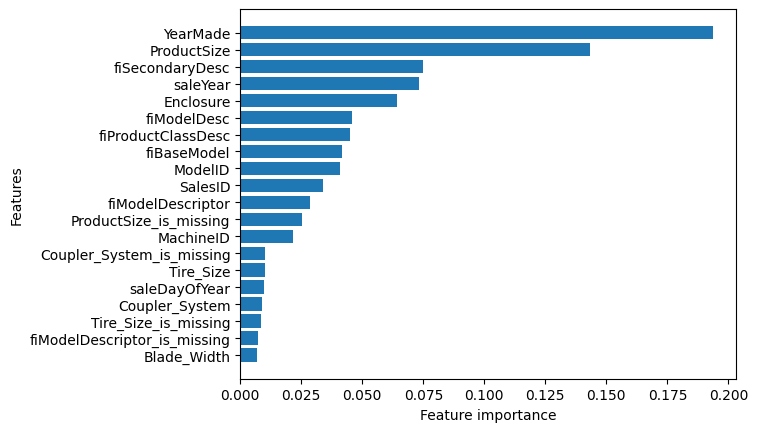

In [210]:
plot_features(X_train.columns, ideal_model.feature_importances_)

In [211]:
X_train["ProductSize"].value_counts()

,count
ProductSize,
0,212625
4,62833
3,50133
7,26706
5,25088
2,21106
1,6187
6,1


In [212]:
df["ProductSize"].value_counts()

,count
ProductSize,
Medium,64342
Large / Medium,51297
Small,27057
Mini,25721
Large,21396
Compact,6280


In [213]:
df["Enclosure"].value_counts()

,count
Enclosure,
OROPS,177971
EROPS,141769
EROPS w AC,92601
EROPS AC,18
NO ROPS,3
None or Unspecified,2
